## Tutorial 1

In [1]:
from load_raw_data import *
from matplotlib.pyplot import rc_context
#from data_load_19 import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import anndata
import scanpy as sc

scanpy==1.8.1 anndata==0.7.6 umap==0.5.1 numpy==1.20.0 scipy==1.7.1 pandas==1.3.3 scikit-learn==1.0 statsmodels==0.13.0 python-igraph==0.9.6 pynndescent==0.5.4


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Vari

In [2]:
sampleLabel = ['SING_52', 'SING_56', 'SING_57',
               'SING_60', 'SING_62', 'SING_64', 'SING_65',
               'SING_67', 'SING_68', 'SING_69', 'SING_71',
               'SING_72', 'SING_74', 'SING_76', 'SING_77',
               'OC4', 'OC10', 'OC12', 'OC15']


In [3]:
SING_52.obs['sample'] = 'SING_52'

SING_56.obs['sample'] = 'SING_56'
SING_57.obs['sample'] = 'SING_57'
SING_60.obs['sample'] = 'SING_60'
SING_62.obs['sample'] = 'SING_62'
SING_64.obs['sample'] = 'SING_64'
SING_65.obs['sample'] = 'SING_65'
SING_67.obs['sample'] = 'SING_67'
SING_68.obs['sample'] = 'SING_68'


SING_69.obs['sample'] = 'SING_69'
SING_71.obs['sample'] = 'SING_71'
SING_72.obs['sample'] = 'SING_72'
SING_74.obs['sample'] = 'SING_74'
SING_76.obs['sample'] = 'SING_76'

SING_77.obs['sample'] = 'SING_77'
OC4.obs['sample'] = 'OC4'
OC10.obs['sample'] = 'OC10'
OC12.obs['sample'] = 'OC12'
OC15.obs['sample'] = 'OC15'



In [4]:
adata = SING_52.concatenate(SING_56, SING_57, SING_60, 
                            SING_62, SING_64, SING_65,               
                            SING_67, SING_68, SING_69, 
                            SING_71, SING_72, SING_74, 
                            SING_76, SING_77,OC4, 
                            OC10, OC12, OC15)

In [5]:
print(adata.obs['sample'].value_counts())


SING_56    3163
SING_52    2493
SING_60    2112
SING_62    2098
SING_71    2079
OC12       2043
SING_68    2005
SING_69    1897
SING_67    1897
OC10       1781
SING_76    1740
SING_77    1707
SING_74    1661
SING_72    1600
OC15       1450
SING_57    1369
SING_65    1241
OC4         924
SING_64     852
Name: sample, dtype: int64


In [6]:
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
adata.var['ribo'] = adata.var_names.str.startswith(("RPS","RPL"))


In [7]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo'], percent_top=None, log1p=False, inplace=True)


In [8]:
adata

AnnData object with n_obs × n_vars = 34112 × 31915
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'feature_types', 'genome', 'gene_ids-0', 'gene_ids-1', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-14', 'gene_ids-15', 'gene_ids-16', 'gene_ids-17', 'gene_ids-18', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'spatial'

In [9]:
sc.pp.filter_cells(adata, min_counts=200)
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=5)

print(adata.n_obs, adata.n_vars)


32628 23144


In [10]:
# filter for percent mito
adata = adata[adata.obs['pct_counts_mt'] < 15, :]

# filter for percent ribo > 0.05
adata = adata[adata.obs['pct_counts_ribo'] > 5, :]

print("Remaining cells %d"%adata.n_obs)


Remaining cells 32478


In [11]:
# save normalized counts in raw slot.
adata.raw = adata


In [12]:
adata

AnnData object with n_obs × n_vars = 32478 × 23144
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'feature_types', 'genome', 'gene_ids-0', 'gene_ids-1', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-14', 'gene_ids-15', 'gene_ids-16', 'gene_ids-17', 'gene_ids-18', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    obsm: 'spatial'

In [13]:
# save the file for Integration

save_file = 'data/results/ov_19_merged_pped.h5ad'
adata.write_h5ad(save_file)


/home/ubuntu/pyenv/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'sample' as categorical
/home/ubuntu/pyenv/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'feature_types' as categorical
/home/ubuntu/pyenv/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unuse

In [13]:

sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)


In [14]:
sc.pp.log1p(adata)

In [15]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]

In [16]:
adata

View of AnnData object with n_obs × n_vars = 32478 × 4313
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'feature_types', 'genome', 'gene_ids-0', 'gene_ids-1', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-14', 'gene_ids-15', 'gene_ids-16', 'gene_ids-17', 'gene_ids-18', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'spatial'

In [17]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

/home/ubuntu/pyenv/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
/home/ubuntu/pyenv/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'sample' as categorical
/home/ubuntu/pyenv/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
Trying to set attribute `.var` of view, copying.
... storing 'featur

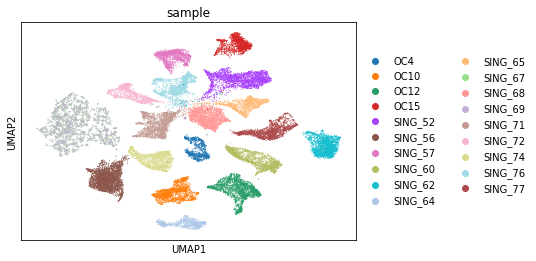

In [18]:
sc.pl.umap(adata, color=['sample'])


In [19]:
# also revert back to the raw counts as the main matrix in adataadat

adata

AnnData object with n_obs × n_vars = 32478 × 4313
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'feature_types', 'genome', 'gene_ids-0', 'gene_ids-1', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-14', 'gene_ids-15', 'gene_ids-16', 'gene_ids-17', 'gene_ids-18', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'sample_colors'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [20]:
# also revert back to the raw counts as the main matrix in adata
adata = adata.raw.to_adata() 
print(adata.shape)





(32478, 23144)


In [21]:
adata

AnnData object with n_obs × n_vars = 32478 × 23144
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'feature_types', 'genome', 'gene_ids-0', 'gene_ids-1', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-14', 'gene_ids-15', 'gene_ids-16', 'gene_ids-17', 'gene_ids-18', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'sample_colors'
    obsm: 'spatial', 'X_pca', 'X_umap'

In [ ]:
save_file = 'data/results/qc_tutorial_1.h5ad'
adata.write_h5ad(save_file)

## Tutorial 2

In [ ]:
#from load_raw_data import *
from matplotlib.pyplot import rc_context
#from data_load_19 import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import anndata
import scanpy as sc

In [5]:
adata = sc.read_h5ad('data/results/qc_tutorial_1.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 32478 × 23144
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'feature_types', 'genome', 'gene_ids-0', 'gene_ids-1', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-14', 'gene_ids-15', 'gene_ids-16', 'gene_ids-17', 'gene_ids-18', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'hvg', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'

In [7]:
# normalize to depth 10 000
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

# logaritmize|
sc.pp.log1p(adata)

In [8]:
adata.raw = adata


In [9]:
adata

AnnData object with n_obs × n_vars = 32478 × 23144
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'feature_types', 'genome', 'gene_ids-0', 'gene_ids-1', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-14', 'gene_ids-15', 'gene_ids-16', 'gene_ids-17', 'gene_ids-18', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'hvg', 'neighbors', 'pca', 'sample_colors', 'umap', 'log1p'
    obsm: 'X_pca', 'X_umap', 'spatial'

Highly variable genes: 4313


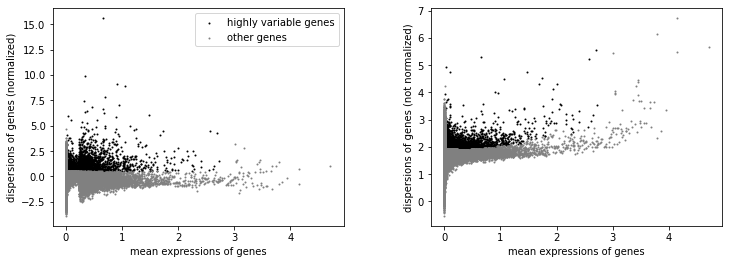

In [10]:
# compute variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
print("Highly variable genes: %d"%sum(adata.var.highly_variable))

#plot variable genes
sc.pl.highly_variable_genes(adata)

# subset for variable genes in the dataset
adata = adata[:, adata.var['highly_variable']]

In [11]:
# adata = adata.copy()     #run this line if you get the "AttributeError: swapaxes not found" 

# regress out unwanted variables
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])


# scale data, clip values exceeding standard deviation 10.
sc.pp.scale(adata, max_value=10)

In [12]:
sc.tl.pca(adata, svd_solver='arpack')

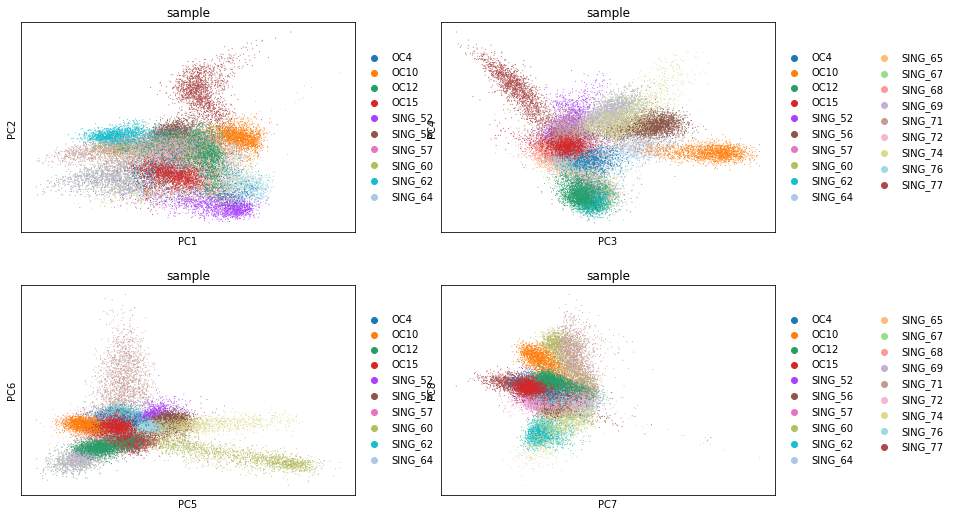

In [14]:
 #plot more PCS

sc.pl.pca(adata, color='sample', components = ['1,2','3,4','5,6','7,8'], ncols=2)

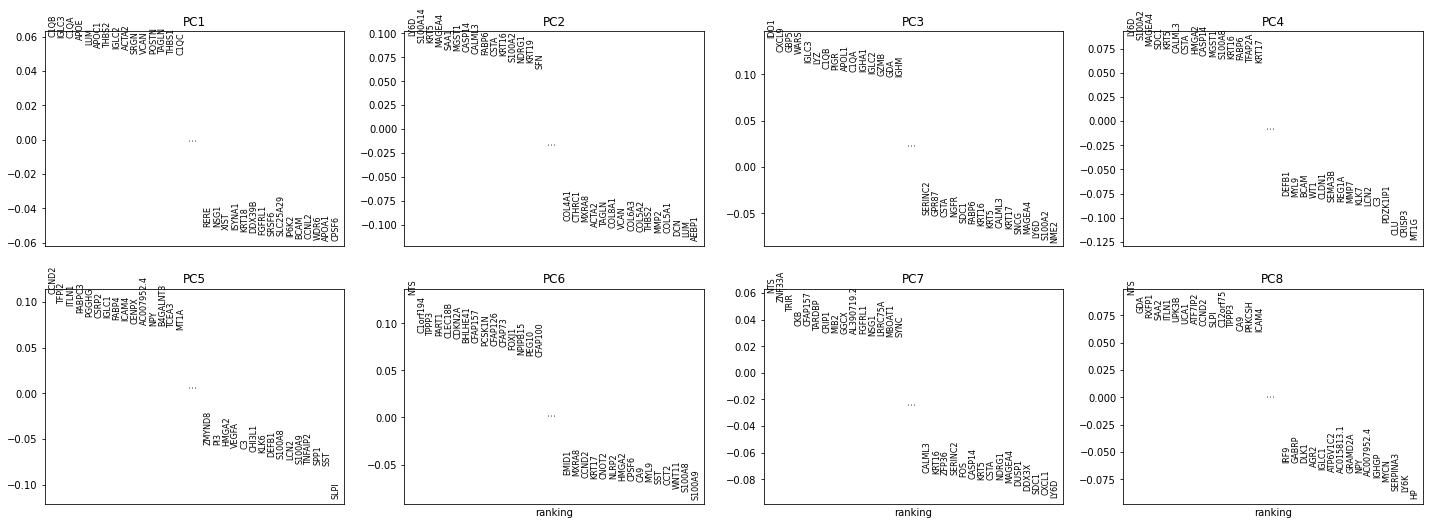

In [15]:
#Plot loadings
sc.pl.pca_loadings(adata, components=[1,2,3,4,5,6,7,8])

# OBS! only plots the positive axes genes from each PC!!

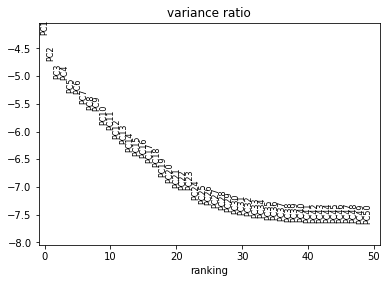

In [16]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)


In [17]:
sc.tl.tsne(adata, n_pcs = 30)

/home/ubuntu/pyenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


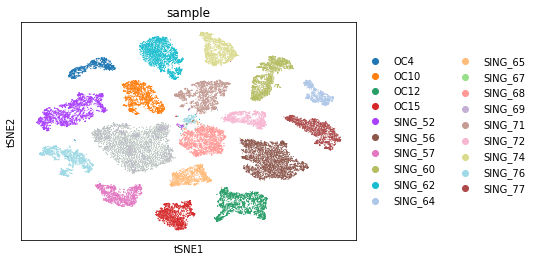

In [18]:
sc.pl.tsne(adata, color='sample')


In [19]:
sc.pp.neighbors(adata, n_pcs = 30, n_neighbors = 20)

umap 을 돌리기 전에는 neighbors 를 돌려야 한다. 

In [20]:
sc.tl.umap(adata)

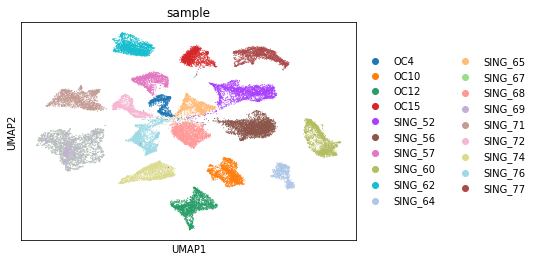

In [21]:
sc.pl.umap(adata, color='sample')

In [22]:
adata.X.shape

(32478, 4313)

In [23]:
adata.raw.X.shape

(32478, 23144)

In [24]:
adata

AnnData object with n_obs × n_vars = 32478 × 4313
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'feature_types', 'genome', 'gene_ids-0', 'gene_ids-1', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-14', 'gene_ids-15', 'gene_ids-16', 'gene_ids-17', 'gene_ids-18', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'neighbors', 'pca', 'sample_colors', 'umap', 'log1p', 'tsne'
    obsm: 'X_pca', 'X_umap', 'spatial', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [25]:
adata.write_h5ad('./data/results/qc_tutorial_2.h5ad')

## Tutorial 3

In [1]:
#from load_raw_data import *
from matplotlib.pyplot import rc_context
#from data_load_19 import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import anndata
import scanpy as sc

In [2]:
# Load the stored data object
save_file = './data/results/qc_tutorial_2.h5ad'
adata = sc.read_h5ad(save_file)

In [3]:
adata

AnnData object with n_obs × n_vars = 32478 × 4313
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'feature_types', 'genome', 'gene_ids-0', 'gene_ids-1', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-14', 'gene_ids-15', 'gene_ids-16', 'gene_ids-17', 'gene_ids-18', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'neighbors', 'pca', 'sample_colors', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [4]:
print(adata.X.shape)

(32478, 4313)


In [5]:
adata2 = adata.raw.to_adata() 

# check that the matrix looks like noramlized counts
print(adata2.X[1:10,1:10])

  (0, 8)	1.5870976
  (2, 8)	1.0337517
  (3, 6)	1.1536268
  (4, 7)	0.40967566
  (5, 6)	1.5439905
  (6, 6)	0.5927901
  (6, 8)	0.3396916


In [6]:
adata2

AnnData object with n_obs × n_vars = 32478 × 23144
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'feature_types', 'genome', 'gene_ids-0', 'gene_ids-1', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-14', 'gene_ids-15', 'gene_ids-16', 'gene_ids-17', 'gene_ids-18', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'hvg', 'neighbors', 'pca', 'sample_colors', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'spatial'

In [7]:
var_genes_all = adata.var.highly_variable

In [9]:
print("Highly variable genes: %d"%sum(var_genes_all))


Highly variable genes: 4313


In [10]:
sc.pp.highly_variable_genes(adata2, min_mean=0.0125, max_mean=3, min_disp=0.5, batch_key = 'sample')


In [11]:
print("Highly variable genes intersection: %d"%sum(adata2.var.highly_variable_intersection))

Highly variable genes intersection: 6


In [12]:
print("Number of batches where gene is variable:")
print(adata2.var.highly_variable_nbatches.value_counts())

Number of batches where gene is variable:
0     4610
1     2355
4     2067
2     2020
3     1947
5     1946
6     1879
7     1612
8     1419
9     1098
10     757
11     550
12     333
13     222
14     140
15      86
16      54
17      31
18      12
19       6
Name: highly_variable_nbatches, dtype: int64


In [13]:
var_genes_batch = adata2.var.highly_variable_nbatches > 0

In [14]:
print("Any batch var genes: %d"%sum(var_genes_batch))
print("All data var genes: %d"%sum(var_genes_all))
print("Overlap: %d"%sum(var_genes_batch & var_genes_all))
print("Variable genes in all batches: %d"%sum(adata2.var.highly_variable_nbatches == 6))
print("Overlap batch instersection and all: %d"%sum(var_genes_all & adata2.var.highly_variable_intersection))

Any batch var genes: 18534
All data var genes: 4313
Overlap: 4302
Variable genes in all batches: 1879
Overlap batch instersection and all: 6


In [15]:
var_select = adata2.var.highly_variable_nbatches > 2
var_genes = var_select.index[var_select]
len(var_genes)

14159

In [16]:
# split per batch into new objects.
batches = adata.obs['sample'].cat.categories.tolist()
alldata = {}
for batch in batches:
    alldata[batch] = adata2[adata2.obs['sample'] == batch,]

alldata    

{'OC4': View of AnnData object with n_obs × n_vars = 920 × 23144
     obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
     var: 'feature_types', 'genome', 'gene_ids-0', 'gene_ids-1', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-14', 'gene_ids-15', 'gene_ids-16', 'gene_ids-17', 'gene_ids-18', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
     uns: 'hvg', 'neighbors', 'pca', 'sample_colors', 'tsne', 'umap'
     obsm: 'X_pca', 'X_tsne', 'X_umap', 'spatial',
 'OC10': View of AnnData object with n_obs × n_vars = 1737 × 23144
     obs:

### run combat batch correction

In [17]:
# create a new object with lognormalized counts
adata_combat = sc.AnnData(X=adata.raw.X, var=adata.raw.var, obs = adata.obs)


# first store the raw data 
adata_combat.raw = adata_combat

# run combat
sc.pp.combat(adata_combat, key='sample')

/home/ubuntu/pyenv/lib/python3.8/site-packages/scanpy/preprocessing/_combat.py:340: RuntimeWarning: divide by zero encountered in true_divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


Highly variable genes: 4600


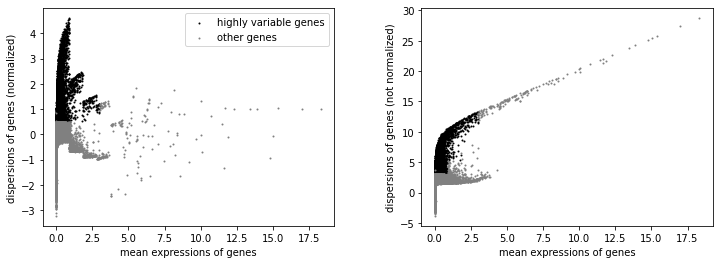

In [18]:
sc.pp.highly_variable_genes(adata_combat)
print("Highly variable genes: %d"%sum(adata_combat.var.highly_variable))
sc.pl.highly_variable_genes(adata_combat)


In [19]:
sc.pp.pca(adata_combat, n_comps=30, use_highly_variable=True, svd_solver='arpack')


In [20]:
sc.pp.neighbors(adata_combat, n_pcs =30)

sc.tl.umap(adata_combat)
sc.tl.tsne(adata_combat, n_pcs = 30)

/home/ubuntu/pyenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [21]:
# compare var_genes
var_genes_combat = adata_combat.var.highly_variable
print("With all data %d"%sum(var_genes_all))
print("With combat %d"%sum(var_genes_combat))
print("Overlap %d"%sum(var_genes_all & var_genes_combat))

print("With 2 batches %d"%sum(var_select))
print("Overlap %d"%sum(var_genes_combat & var_select))

With all data 4313
With combat 4600
Overlap 1656
With 2 batches 14159
Overlap 4097


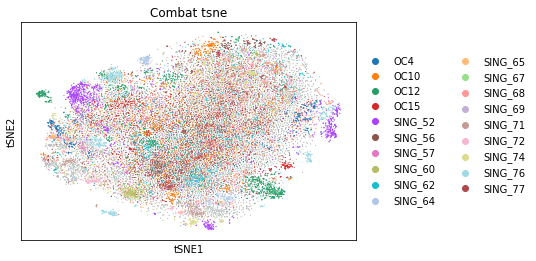

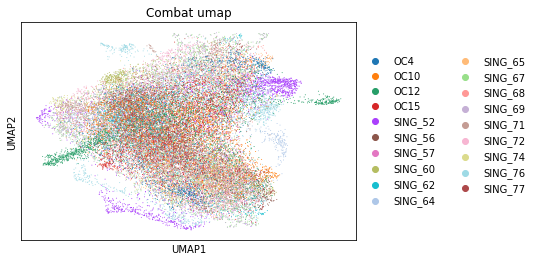

In [25]:
#sc.pl.tsne(corr_data, color="sample", title="MNN tsne", ax=axs[0,0], show=False)
sc.pl.tsne(adata_combat, color="sample", title="Combat tsne")
#sc.pl.umap(corr_data, color="sample", title="MNN umap", ax=axs[1,0], show=False)
sc.pl.umap(adata_combat, color="sample", title="Combat umap")

In [26]:
sc.tl.pca(adata, svd_solver='arpack', title="PCA")

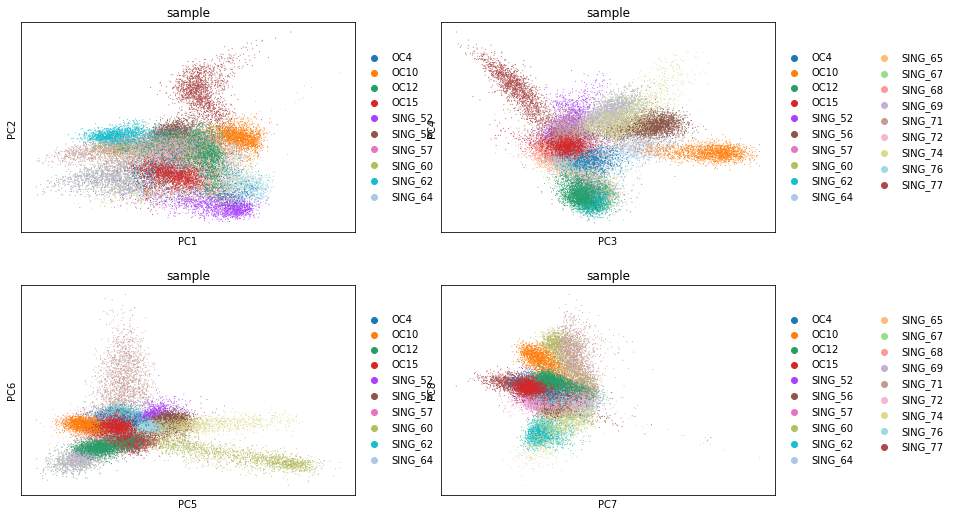

In [27]:
sc.pl.pca(adata, color='sample', components = ['1,2','3,4','5,6','7,8'], ncols=2)